## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [21]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


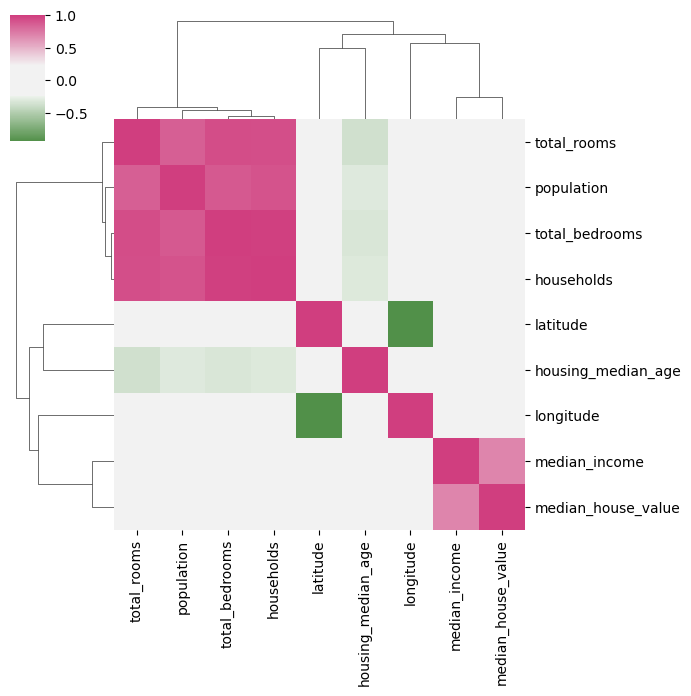

In [9]:
df_numericos = df.select_dtypes(include=['float64','int64'])

cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light')
sns.clustermap((df_numericos.corr()), figsize=(7,7), center=0, cmap=cmap)

In [11]:
X = df.drop(columns = ['latitude','longitude','housing_median_age','median_house_value']).copy()
X = pd.get_dummies(X,drop_first=True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_rooms                 20640 non-null  float64
 1   total_bedrooms              20433 non-null  float64
 2   population                  20640 non-null  float64
 3   households                  20640 non-null  float64
 4   median_income               20640 non-null  float64
 5   ocean_proximity_INLAND      20640 non-null  bool   
 6   ocean_proximity_ISLAND      20640 non-null  bool   
 7   ocean_proximity_NEAR BAY    20640 non-null  bool   
 8   ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(5)
memory usage: 887.0 KB
None


,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


In [13]:
y = df.loc[:,'median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2360873)

In [17]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [23]:
y_train_pred_1 = regr_1.predict(X_train)
y_train_pred_2 = regr_2.predict(X_train)

y_test_pred_1 = regr_1.predict(X_test)
y_test_pred_2 = regr_2.predict(X_test)

mse_train_1 = mean_squared_error(y_train, y_train_pred_1)
mse_test_1 = mean_squared_error(y_test, y_test_pred_1)

mse_train_2 = mean_squared_error(y_train, y_train_pred_2)
mse_test_2 = mean_squared_error(y_test, y_test_pred_2)

print(f"MSE da arvore 1 na base de treinamento: {mse_train_1}")
print(f"MSE da arvore 1 na base de teste: {mse_test_1}")

print(f"MSE da arvore 2 na base de treinamento: {mse_train_2}")
print(f"MSE da arvore 2 na base de teste: {mse_test_2}")

MSE da arvore 1 na base de treinamento: 6793591556.609171
MSE da arvore 1 na base de teste: 6594347608.632567
MSE da arvore 2 na base de treinamento: 4183257507.2829475
MSE da arvore 2 na base de teste: 4862294749.447114


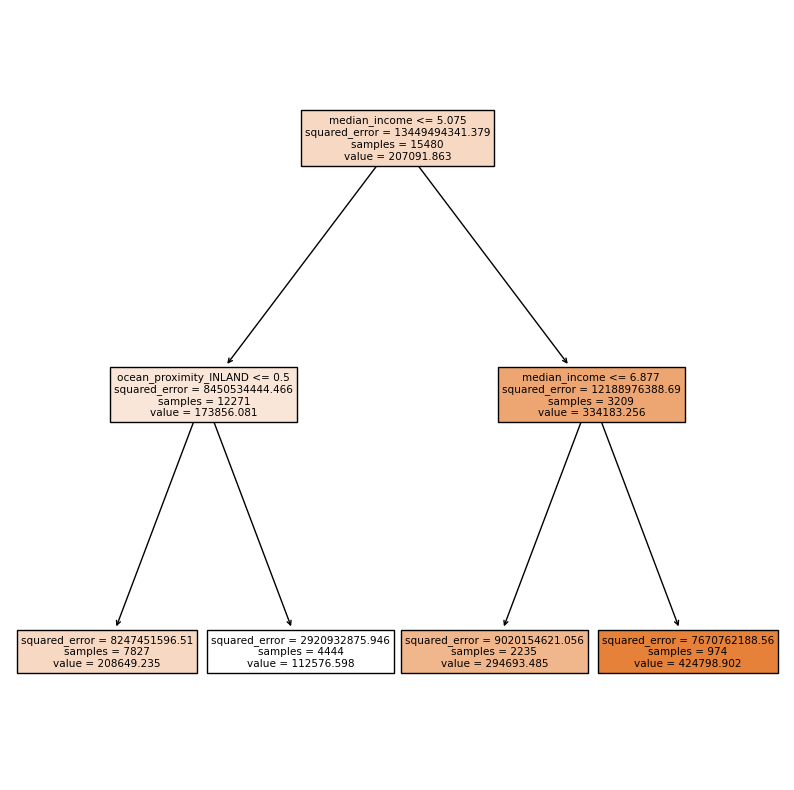

In [25]:
plt.rc('figure',figsize=(10,10))
tp = tree.plot_tree(regr_1,
                    feature_names=X.columns,
                    filled=True)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [28]:
path = regr_2.cost_complexity_pruning_path(X_train,y_train)
path

{'ccp_alphas': array([0.00000000e+00, 8.98766260e+03, 9.30683464e+03, 1.52213609e+04,
        2.01873385e+04, 4.02483850e+04, 4.49306632e+04, 5.14083764e+04,
        6.21877692e+04, 6.39735194e+04, 6.54069767e+04, 8.07493540e+04,
        8.07525840e+04, 8.07525840e+04, 8.14922481e+04, 8.76494401e+04,
        1.00934167e+05, 1.06791021e+05, 1.07665805e+05, 1.43267442e+05,
        1.81686047e+05, 2.06380962e+05, 2.21399225e+05, 2.29082849e+05,
        2.56899059e+05, 2.99909274e+05, 3.50952758e+05, 3.61350560e+05,
        3.94536337e+05, 4.05219380e+05, 4.80052095e+05, 4.83436800e+05,
        5.08692722e+05, 5.10160226e+05, 5.12346490e+05, 5.64492069e+05,
        5.67988028e+05, 6.20355330e+05, 6.81080448e+05, 6.87352961e+05,
        8.21116546e+05, 8.61339363e+05, 9.31585678e+05, 9.55951979e+05,
        1.20149185e+06, 1.20699410e+06, 1.24754694e+06, 1.26171797e+06,
        1.26214112e+06, 1.27711508e+06, 1.39257667e+06, 1.40548949e+06,
        1.44352499e+06, 1.48334916e+06, 1.51307581

In [38]:
arvore_final = DecisionTreeRegressor(random_state=0,ccp_alpha=.01)
arvore_final.fit(X_train,y_train)

print(f"Profundiade: {arvore_final.tree_.max_depth}")
print(f"R-Quadrado na base de testes: {arvore_final.score(X_test,y_test):.2f}")
print(f"MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test )):.2f}")

Profundiade: 33
R-Quadrado na base de testes: 0.39
MSE na base de testes: 7874511068.00


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [32]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)

Text(0, 0.5, 'Impureza total das folhas')

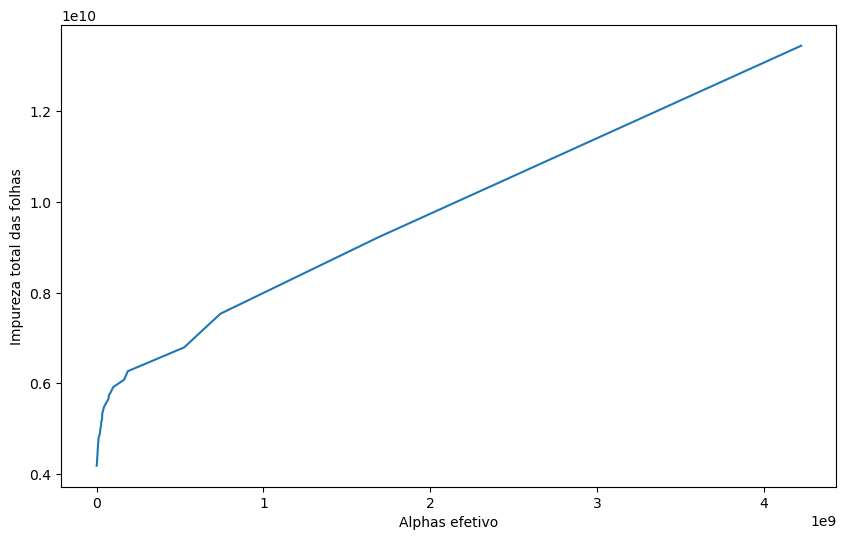

In [30]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10,6))
plt.plot(ccp_alphas,impurities)
plt.xlabel("Alphas efetivo")
plt.ylabel("Impureza total das folhas")

Text(0, 0.5, 'Profundidade da arvore')

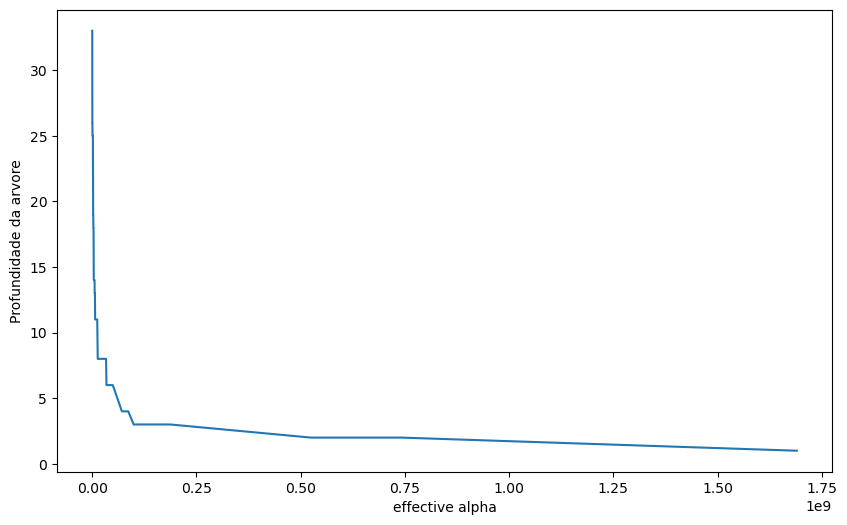

In [33]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:-1],tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da arvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [40]:
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

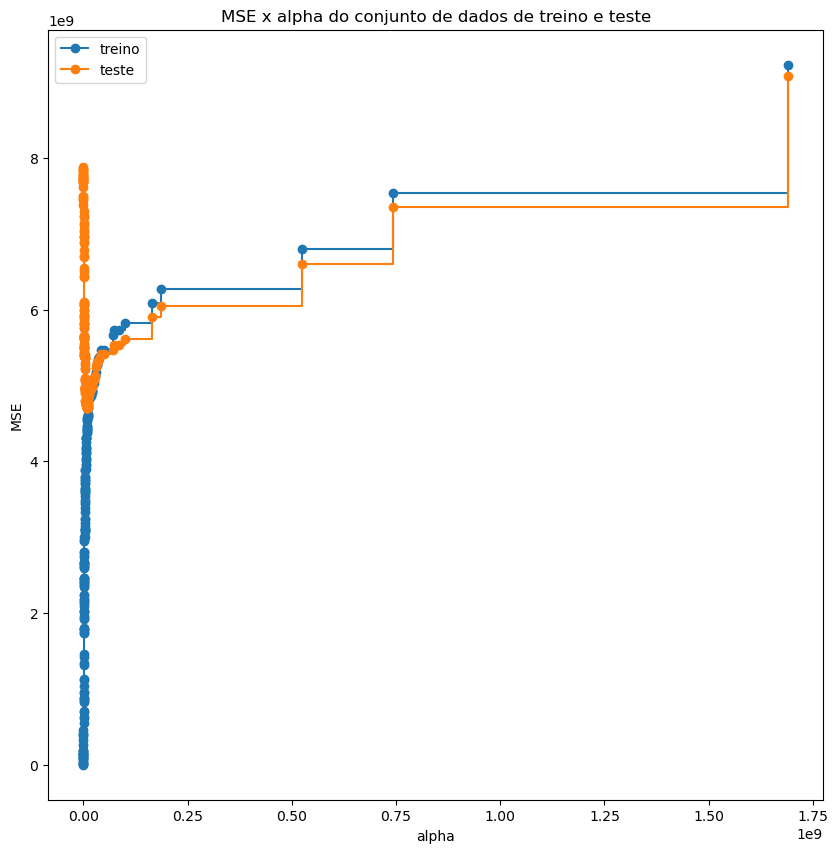

In [42]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label='treino',
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label='teste',
        drawstyle="steps-post")
ax.legend()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [50]:
arvore_final = DecisionTreeRegressor(random_state=0,ccp_alpha=25000000)
arvore_final.fit(X_train,y_train)

print(f"Profundiade: {arvore_final.tree_.max_depth}")
print(f"R-Quadrado na base de testes: {arvore_final.score(X_test,y_test):.2f}")
print(f"MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test )):.2f}")

Profundiade: 8
R-Quadrado na base de testes: 0.61
MSE na base de testes: 5077630145.12


### 7. Visualize esta árvore.

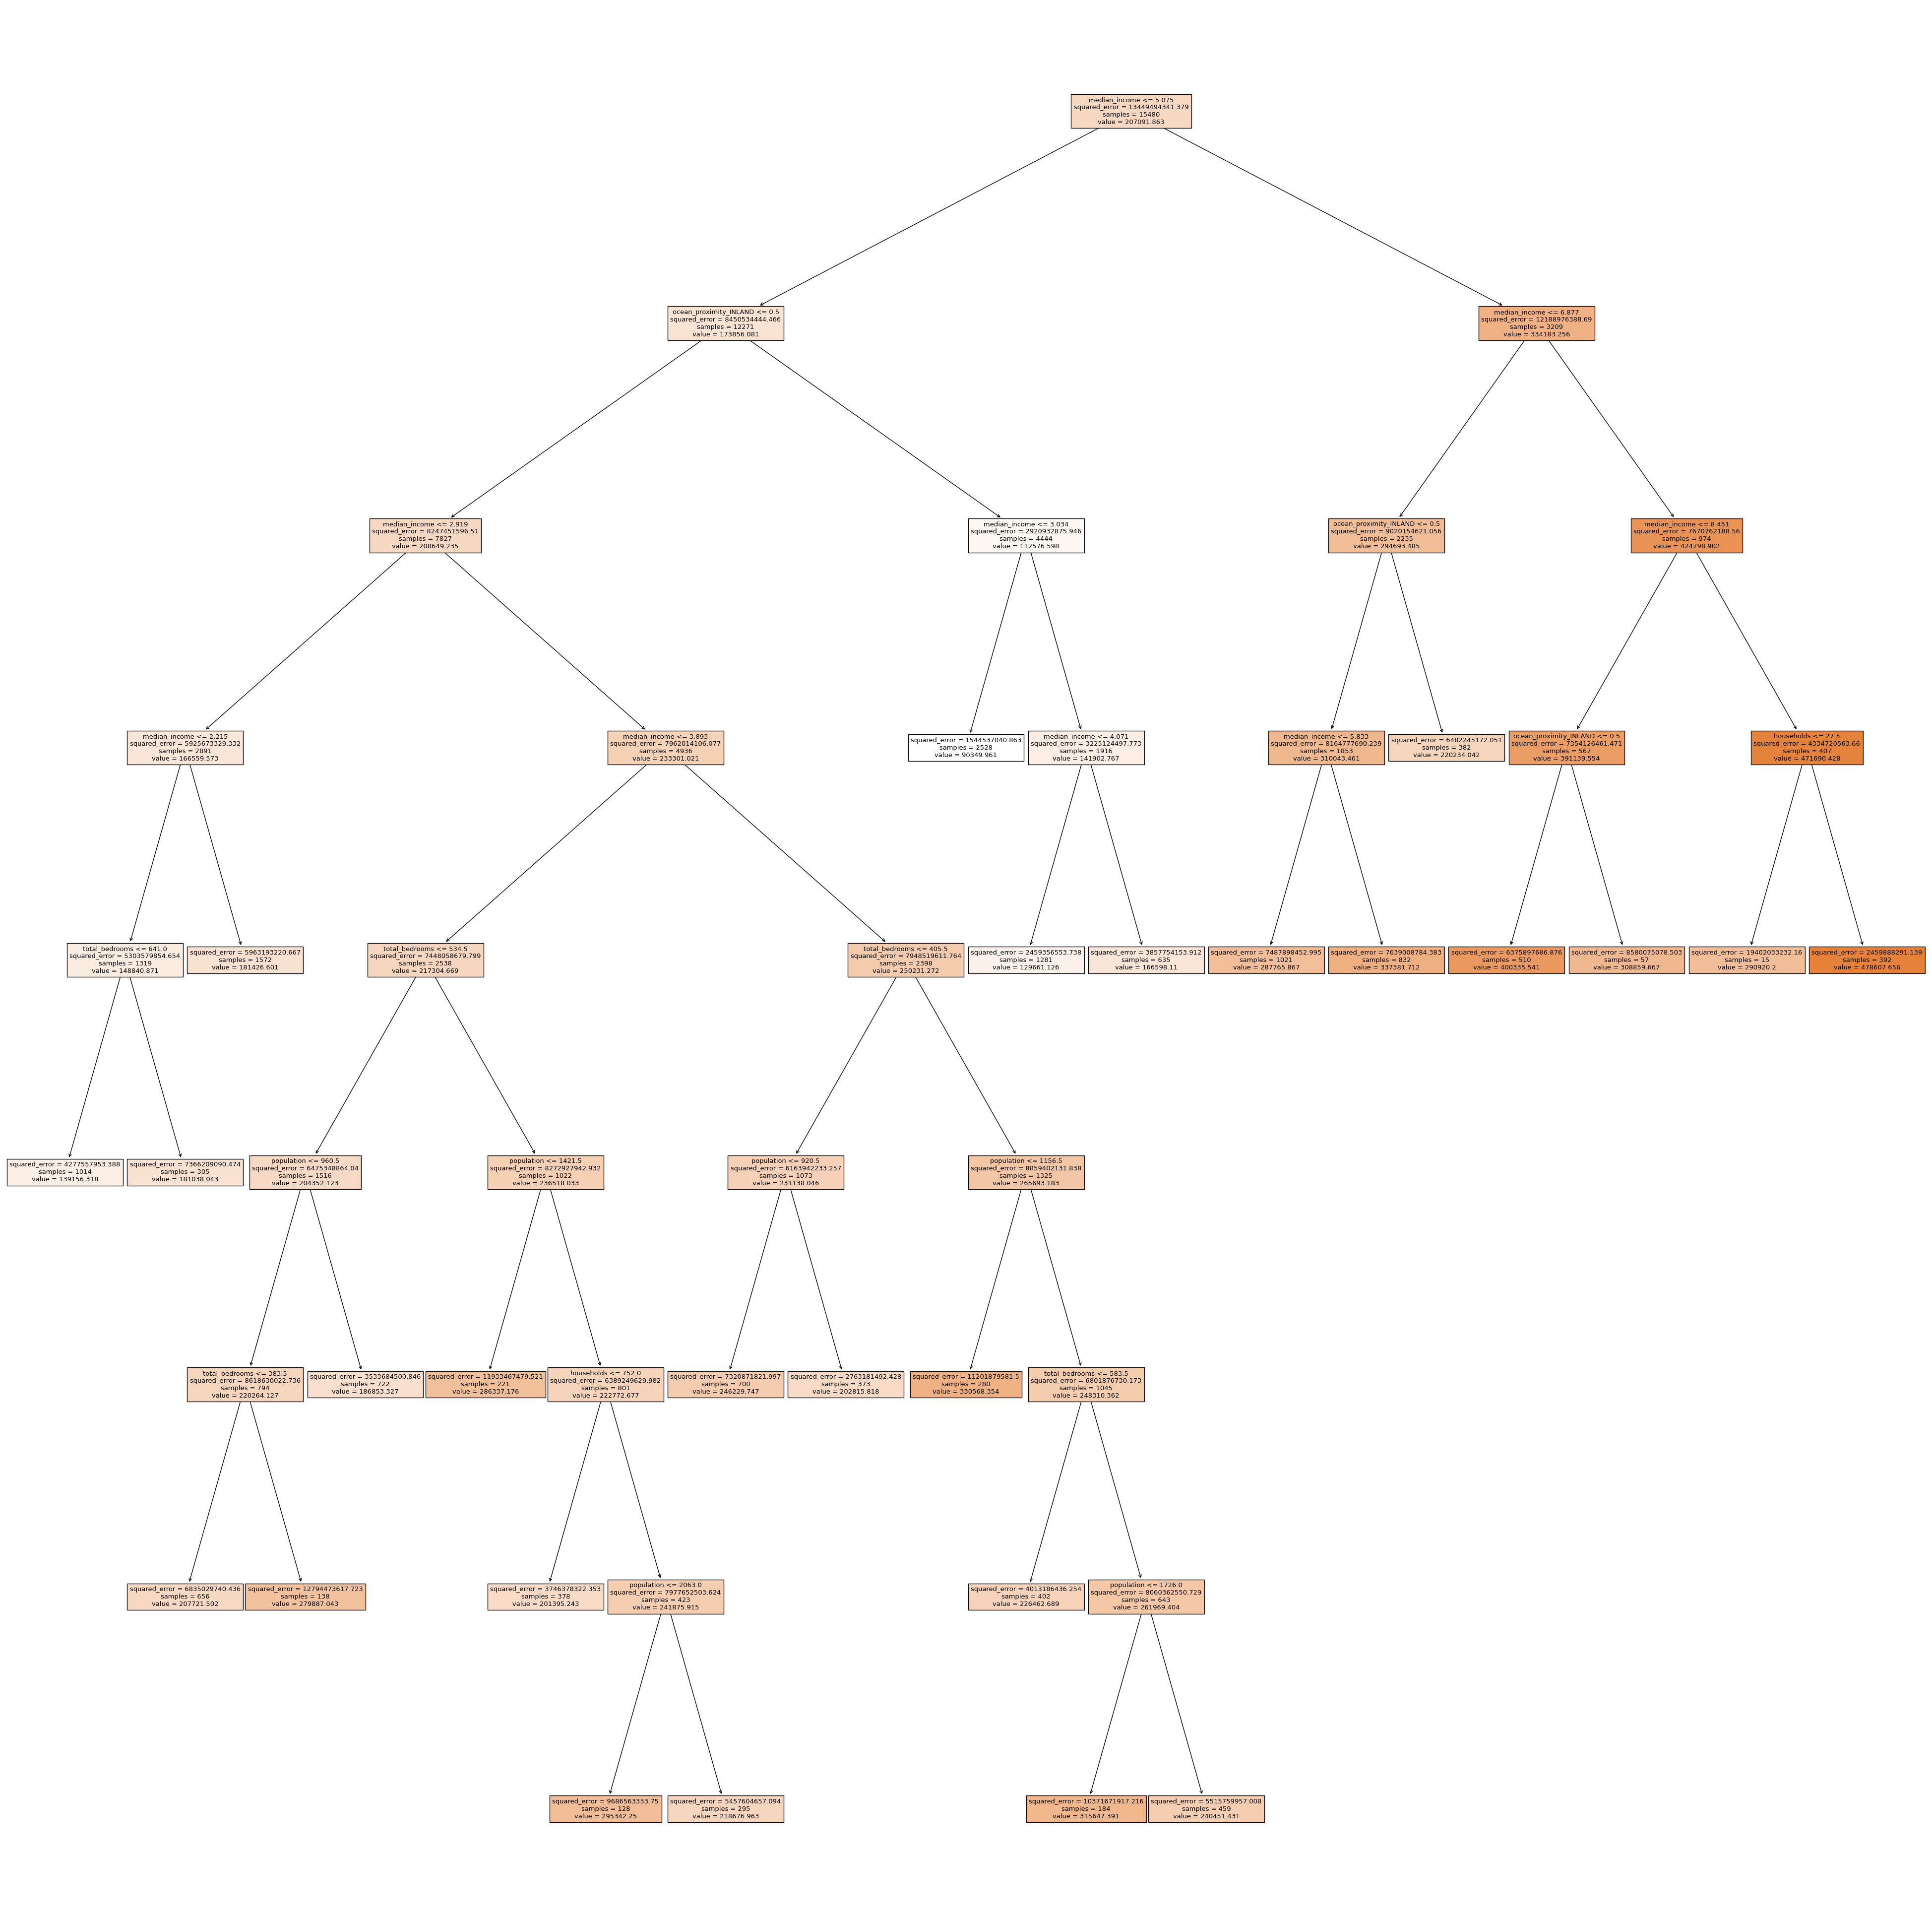

In [52]:
plt.rc('figure', figsize=(50, 50))
tp = tree.plot_tree(arvore_final,
                    feature_names=X.columns,
                    filled=True)